In [2]:
#Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

Ques 1

In [3]:
# Function returning the square wave
def x_t(t):
    x = []
    for i in range(len(t)):
        if t[i]>=0 and t[i]<=1:
            x.append(1)
        else:
            x.append(0)
    return x

# Function to calculate a0 for trigonometric fourier series
def a_0(x,T):
    s=0
    for i in range(len(x)):
        s+=x[i]
    return s/T

# Function to calculate an for trigonometric fourier series
def a_n(n,x,T,t):
    a=[]
    wo = 1/T # Calculating w0
    for i in range(n-1):
        s=0
        for j in range(len(x)):
            s+=x[j]*np.cos(wo*i*t[j])
        a.append((2/T)*s)
    return a

# Function to calculate an for trigonometric fourier series
def b_n(n,x,T,t):
    b=[]
    wo = 1/T # Calculating w0
    for i in range(n-1):
        s=0
        for j in range(len(x)):
            s+=x[j]*np.sin(wo*i*t[j])
        b.append((2/T)*s)
    return b

# Function to calculate the reconstructed signal
def x_r(a0,an,bn,n,t,T): # Function taking input as the F.S coefficients, time period and time sequence
    wo = 1/T # Calculating w0
    x=[]
    # Reconstructing the signal for every time instance
    for i in range(len(t)):
        s = 0
        for j in range(n-1):
            s += (an[j]*np.cos(j*wo*t[i]))+(bn[j]*np.sin(j*wo*t[i]))
        s += a0
        x.append(s)
    return x

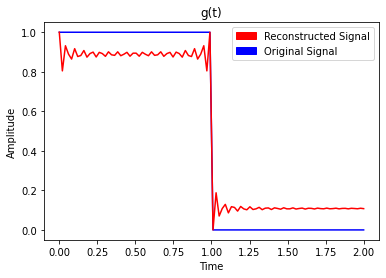

In [4]:
t = np.linspace(0,2,100) # Definning the time instances
n=400 # Value of n
T=2 # Time Period

#O riginal Signal
xt = x_t(t)

# F.S coefficients
a0 = a_0(xt,T)
an = a_n(n,xt,T,t)
bn = b_n(n,xt,T,t)

# Reconstructed signal
xr = x_r(a0,an,bn,n,t,T)

# Normalizing the reconstructed signal
norm_xr = [(float(i)-min(xr))/(max(xr)-min(xr)) for i in xr]

# Plotting the signals
red_patch = mpatches.Patch(color='red', label='Reconstructed Signal')
blue_patch = mpatches.Patch(color='blue', label='Original Signal')
plt.legend(handles=[red_patch,blue_patch])
plt.plot(t,xt,'b')
plt.plot(t,norm_xr,'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('g(t)')
plt.show()

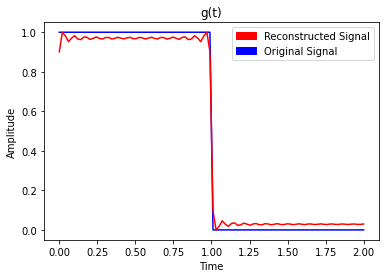

In [5]:
t = np.linspace(0,2,100) # Definning the time instances
n=800 # Value of n
T=2 # Time Period

#O riginal Signal
xt = x_t(t)

# F.S coefficients
a0 = a_0(xt,T)
an = a_n(n,xt,T,t)
bn = b_n(n,xt,T,t)

# Reconstructed signal
xr = x_r(a0,an,bn,n,t,T)

# Normalizing the reconstructed signal
norm_xr = [(float(i)-min(xr))/(max(xr)-min(xr)) for i in xr]

# Plotting the signals
red_patch = mpatches.Patch(color='red', label='Reconstructed Signal')
blue_patch = mpatches.Patch(color='blue', label='Original Signal')
plt.legend(handles=[red_patch,blue_patch])
plt.plot(t,xt,'b')
plt.plot(t,norm_xr,'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('g(t)')
plt.show()

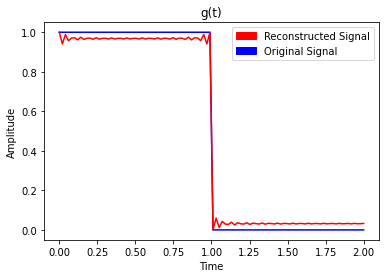

In [6]:
t = np.linspace(0,2,100) # Definning the time instances
n=1000 # Value of n
T=2 # Time Period

#O riginal Signal
xt = x_t(t)

# F.S coefficients
a0 = a_0(xt,T)
an = a_n(n,xt,T,t)
bn = b_n(n,xt,T,t)

# Reconstructed signal
xr = x_r(a0,an,bn,n,t,T)

# Normalizing the reconstructed signal
norm_xr = [(float(i)-min(xr))/(max(xr)-min(xr)) for i in xr]

# Plotting the signals
red_patch = mpatches.Patch(color='red', label='Reconstructed Signal')
blue_patch = mpatches.Patch(color='blue', label='Original Signal')
plt.legend(handles=[red_patch,blue_patch])
plt.plot(t,xt,'b')
plt.plot(t,norm_xr,'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('g(t)')
plt.show()

Gibbs phenomenon decreases with the increase in n

In [64]:
# Function to calculate the DFT
def dft_x(x):
    x_k = []
    N = len(x)
    for i in range(N):
        s_r=0
        s_i=0
        for j in range(N):
            s_r += x[j]*np.cos((2*np.pi*i*j)/N) # Calculating the real part
            s_i += -1*x[j]*np.sin((2*np.pi*i*j)/N) # Calculating the imaginary part
        x_k.append((s_r,s_i)) # Appending both the parts a tuple
    return x_k

#Function to calculate the inverse DFT
def idft_x(x):
    x_n = []
    N = len(x)
    for i in range(N):
        s_r=0
        s_i=0
        for j in range(N):
            s_r += x[j][0]*np.cos((2*np.pi*i*j)/N) # Calculating the real part
            s_i += x[j][1]*np.sin((2*np.pi*i*j)/N) # Calculating the imaginary part
        x_n.append((s_r/N,s_i/N)) # Appending both the parts a tuple
    return x_n

# Function to calculate the power spectral density of the spectrum
def psd_f(x):
    s=[]
    for i in range(len(x)):
        s.append(np.power(x[i][0],2)+np.power(x[i][1],2)) # Magnitude square
    return np.array(s)

Ques 2

In [90]:
# Function to compute the hanning window
def hann_w(n):
    N = len(n)
    x = 0.5*(1-np.cos((2*np.pi/N)*n))
    return x

# Function to compute the hamming window
def hamm_w(n):
    N = len(n)
    x = 0.54 - 0.46*np.cos((2*np.pi/N)*n)
    return x

# Function to compute the Bartlett window
def bar_w(n):
    N = len(n)
    x= []
    for i in range(int(N/2)):
        x.append((2/N)*n[i])
    for i in range(int(N/2),N):
        x.append(2-((2/N)*n[i]))
    return x

/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5, 1.0, 'PSD of x(t)')

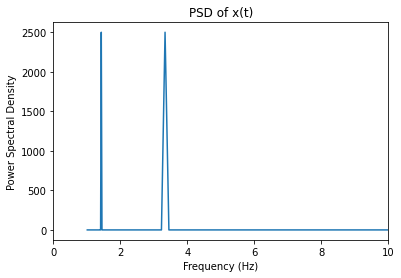

In [79]:
# Sampled time for 100 times a second for 0.99 seconds
t = np.linspace(0,0.99,100)

# Sampled signal
x_t = np.cos(2*np.pi*30*t)

# Computing the DFT of the signal
x_k = np.array(dft_x(x_t))

# Computing the Power Spectral Density of the signal
psd = psd_f(x_k)

# Plotting the Power Spectral Density
plt.plot(1/t,psd)
plt.xlim([0,10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD of x(t)')

/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 1.0, 'PSD of x(t) using hanning window')

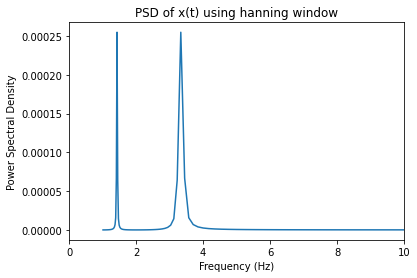

In [94]:
# Computing the hanning window
hann = hann_w(t)

# Computing the signal using hanning window
x_hn = np.multiply(x_t,hann)

# Computing the DFT
x_hn_k = np.array(dft_x(x_hn))

# Computing the Power Spectral Density
psd = psd_f(x_hn_k)

# Plotting the Power Spectral Density
plt.plot(1/t,psd)
plt.xlim([0,10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD of x(t) using hanning window')

/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 1.0, 'PSD of x(t) using hamming window')

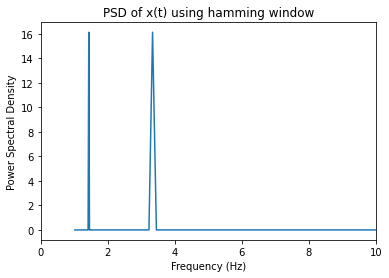

In [95]:
# Computing the hamming window
hamm = hamm_w(t)

# Computing the signal using hamming window
x_h = np.multiply(x_t,hamm)

# Computing the DFT
x_h_k = np.array(dft_x(x_h))

# Computing the Power Spectral Density
psd = psd_f(x_h_k)

# Plotting the Power Spectral Density
plt.plot(1/t,psd)
plt.xlim([0,10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD of x(t) using hamming window')

/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Text(0.5, 1.0, 'PSD of x(t) using Bartlett window')

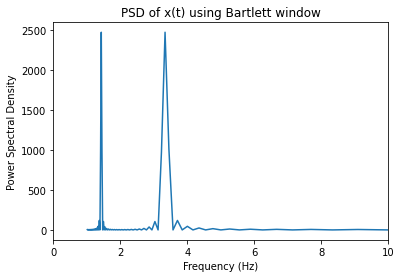

In [92]:
# Computing the Bartlett window
b = bar_w(t)

# Computing the signal using Bartlett window
x_b = np.multiply(x_t,b)

# Computing the DFT
x_b_k = np.array(dft_x(x_b))

# Computing the Power Spectral Density
psd = psd_f(x_b_k)

# Plotting the Power Spectral Density
plt.plot(1/t,psd)
plt.xlim([0,10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD of x(t) using Bartlett window')

Ques 3

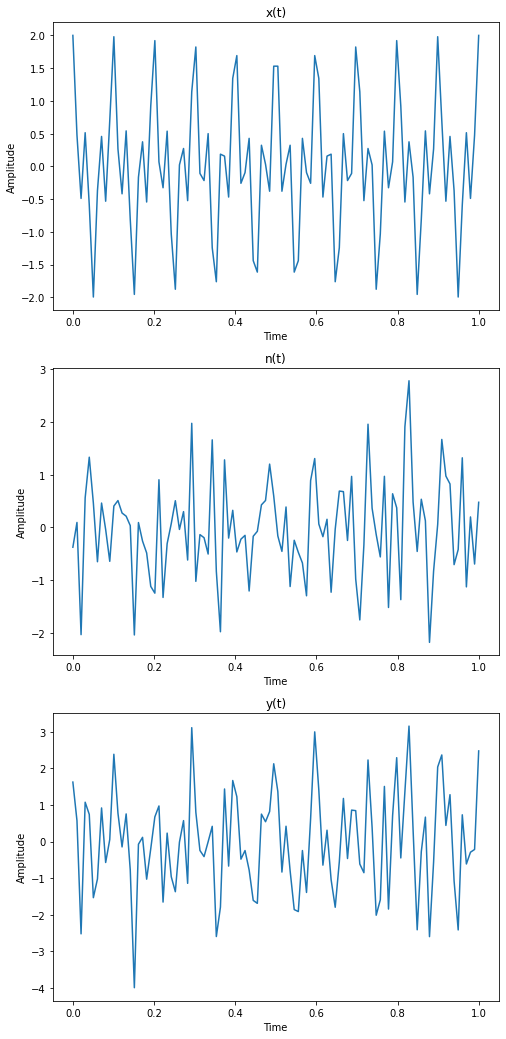

In [39]:
t = np.linspace(0,1,100)

# Generating x(t)
x_t = np.cos(2*np.pi*10*t) + np.cos(2*np.pi*30*t)

# Generating white noise with 0 mean and 1 variance
n_t = np.random.normal(0,1,100)

# Generating y(t) = x(t) + n(t)
y_t = x_t + n_t

# Plotting x(t),n(t) and y(t)
fig = plt.figure(figsize=(8,18))

plt.subplot(3,1,1)
plt.plot(t,x_t)
plt.title('x(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(3,1,2)
plt.plot(t,n_t)
plt.title('n(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(3,1,3)
plt.plot(t,y_t)
plt.title('y(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5, 1.0, 'PSD of y(t)')

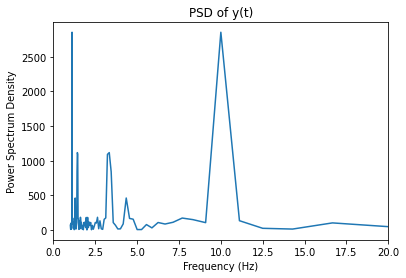

In [75]:
# Computing the DFT of y(t)
y_k = dft_x(y_t)
# Compusing the power spectral density of y(t)
psd_y = psd_f(y_k)

plt.plot(1/t,psd_y)
plt.xlim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum Density')
plt.title('PSD of y(t)')

Text(0.5, 1.0, 'Original & Reconstructed signal')

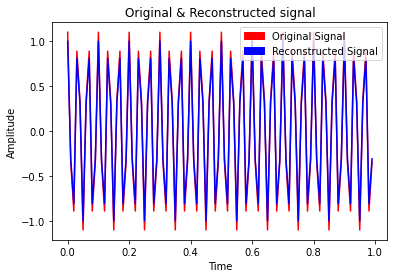

In [73]:
th = 1500
# From the PSD, threshold is 1500
x_kr = []
for i in range(len(x_k)):
    if (np.power(x_k[i][0],2)+np.power(x_k[i][1],2)) < th:
        x_kr.append((0,0))
    else:
        x_kr.append(x_k[i])

# Recovered x(t) from y(t) using the threshold th
x_r = np.array(idft_x(x_kr))

# Plotting the necessary signals
red_patch = mpatches.Patch(color='red', label='Original Signal')
blue_patch = mpatches.Patch(color='blue', label='Reconstructed Signal')
plt.legend(handles=[red_patch,blue_patch],loc='upper right')
plt.plot(t,1.1*x_t,'r') # For visualization purpose, we have scaled the amplitude of original signal in the plot
plt.plot(t,x_r[:,0],'b')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original & Reconstructed signal')